**Exploratory Data Analysis**

This is the most important and time consuming part for any data science project.This helps us in understanding the data better and for other stakeholders too which further helps in making better business decisions. This also helps in understanding how target variable are behaving with different features. This will further help us in feature engineering.


*Before moving ahead with EDA we will first, import some libraries like pandas, numpy, matplotlib etc. Then we will be reading the data*

In [44]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd


# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Understand the Dataset


*Read the Data and This is how our data looks like:*

In [ ]:
# Path to your CSV file
file_path="Data/TRAIN.csv"
# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


*The tail view :*

In [46]:
# Display the last few rows
data.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00


*So , next we will get the information about the data,*

In [47]:
#information about the train dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


**Data Types:**
 - The dataset contains 188,340 entries and 10 columns.

 - Data Types: There are 6 columns with 'object' data type, 3 columns with 'int64' data type and 1 column with 'float64' data type.

   * Numercial Features: These include features like Store_id, Holiday, #Order and Sales.
   
   * Categorcial Features : These include features like
       ID, Store_Type, Location_Type,	Region_Code, Date and Discount.


*The percentage of null values present in the dataset are :*

In [48]:
#checking for missing values
data.isnull().sum()/len(data)*100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

**3.Missing Value Detection**

  * As we can understand from the above dataset , it is evident that there are no missing values.

*Next, we will check for duplicate values.*

In [ ]:
#checking for duplicates
dup = data.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


* As we can observe from the above result , it is evident that there are no duplicates in the dataset.*

# 2. Understanding the Variables:

In [50]:
# Dataset Columns
data.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')


*Next we will do unique values for Vaiables:*

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in ID is 188340
No. of unique values in Store_id is 365
No. of unique values in Store_Type is 4
No. of unique values in Location_Type is 5
No. of unique values in Region_Code is 4
No. of unique values in Date is 516
No. of unique values in Holiday is 2
No. of unique values in Discount is 2
No. of unique values in #Order is 299
No. of unique values in Sales is 47422


In [ ]:
#summary statistic of all the features
data.describe(include='all')

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
count,188340,188340.000000,188340,188340,188340,188340,188340.000000,188340,188340.000000,188340.000000
unique,188340,NaN,4,5,4,516,NaN,2,NaN,NaN
top,T1000001,NaN,S1,L1,R1,2018-01-01,NaN,No,NaN,NaN
freq,1,NaN,88752,85140,63984,365,NaN,104051,NaN,NaN
mean,NaN,183.000000,NaN,NaN,NaN,NaN,0.131783,NaN,68.205692,42784.327982
std,NaN,105.366308,NaN,NaN,NaN,NaN,0.338256,NaN,30.467415,18456.708302
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,92.000000,NaN,NaN,NaN,NaN,0.000000,NaN,48.000000,30426.000000
50%,NaN,183.000000,NaN,NaN,NaN,NaN,0.000000,NaN,63.000000,39678.000000
75%,NaN,274.000000,NaN,NaN,NaN,NaN,0.000000,NaN,82.000000,51909.000000


**Summary Statistics:**

* **Numerical Features:**

  * The target variable 'Sales' column has a mean of 42,784.3279 and a standard deviation of 18456.708, indicating high variability in sales (as the standard deviation is large relative to the mean)

  * Minimun Sales as low as 0 suggest missing or non-productive records and maximun Sales as high as 247,215, representing a significant range.

  * Store IDs range from 1 to 365, suggesting we might have 365 unique stores also count 188,340 entries, meaning we have data for 188,340 transactions or records.

  * Holiday mean 0.13 indicates that around 13.1% of transactions happened on holidays.

  * In Orders column, the average number of orders per record is 68.21. Some records show 0 orders, these might represent data errors or non-productive days. Also the maximum number of orders in a single transaction or day is 371.

* **Categorical Features:**

   * In 'ID' column, there are 188,340 unique IDs, matching the total number of rows. This implies that each record has a unique identifier.

   * 4 unique 'store types' (S1, S2, S3, S4). S1 is the most frequent store type. Also 88,752 records belong to S1, which constitutes ~47% of the data (88752/188340).

   * There are 5 unique location types (L1, L2, etc.). L1 is the most frequent location type. Also 85,140 records belong to L1, which constitutes ~45% of the data (85140/188340).

   * There are 4 unique region codes (R1, R2, etc.). R1 is the most frequent region code.Also 63,984 records belong to R1, which constitutes ~34% of the data (63984/188340).

   * In date column,188,340 entries, no missing values.

# 3. Data wrangling

In [53]:
# Removing the 'ID' column as it's no longer needed
data.drop(['ID'], axis=1, inplace=True)

In [54]:
data.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [55]:
# Defining dependent variable
dependent_variable = ['Sales']

We can see that the 'date' column is currently of the 'Object' data type. To work with it effectively, we should convert it to the pandas datetime format.

In [56]:
#converting the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# 4. Data Visualization : Understand the Relationship between Variables

**1. Univariate Analysis:**

1.Numerical Univariate Analysis : Plotting the distribution of the Numerical features (Sales, Orders) using a histogram and KDE

2.Categorcial Univariate Analysis: Plotting the distribution of the Categorical features (Store_Type, Location_type, Recgion_code,Discount,Holiday) using a Barplot/Countplot.

1. Sales:

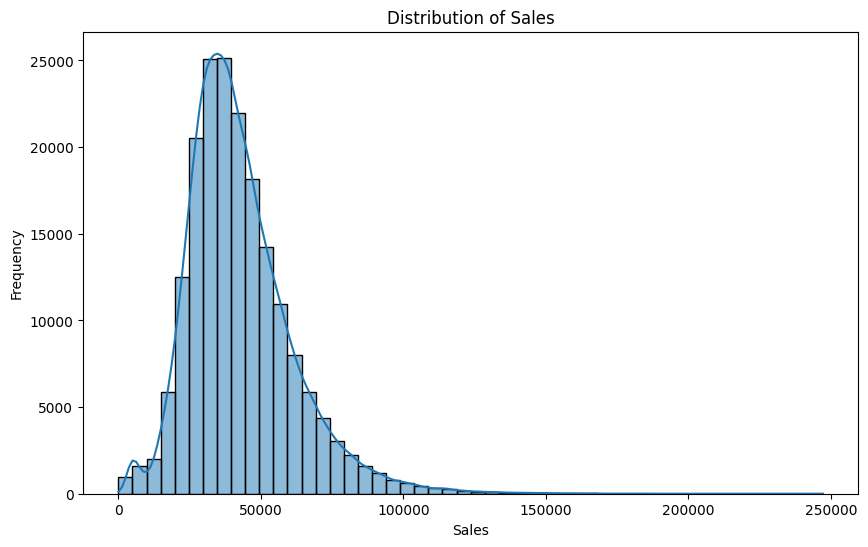

In [ ]:
#Analysing Numerical Feature: Sales
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'], kde=True, bins=50)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

2. Orders

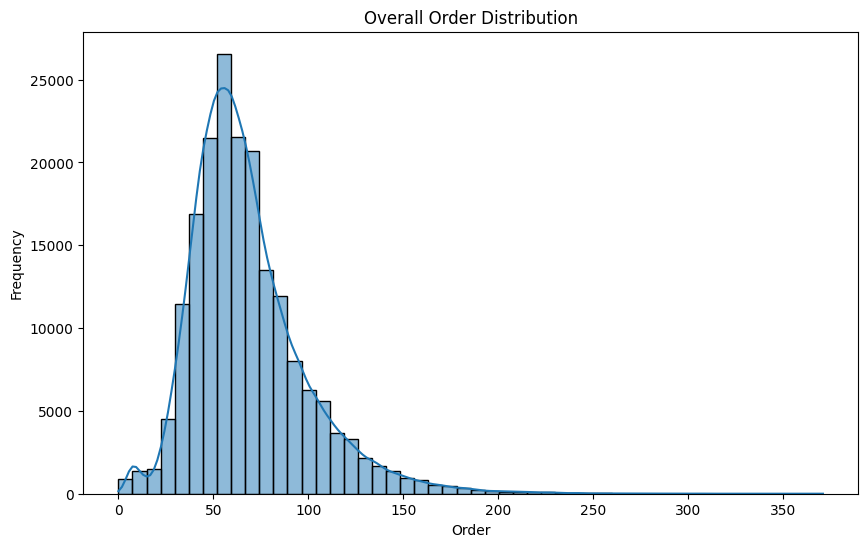

In [58]:
#Analysing Numerical Feature: Orders
plt.figure(figsize=(10,6))
sns.histplot(data['#Order'], kde=True, bins=50)
plt.title('Overall Order Distribution')
plt.xlabel('Order')
plt.ylabel('Frequency')
plt.show()

3. Store Type

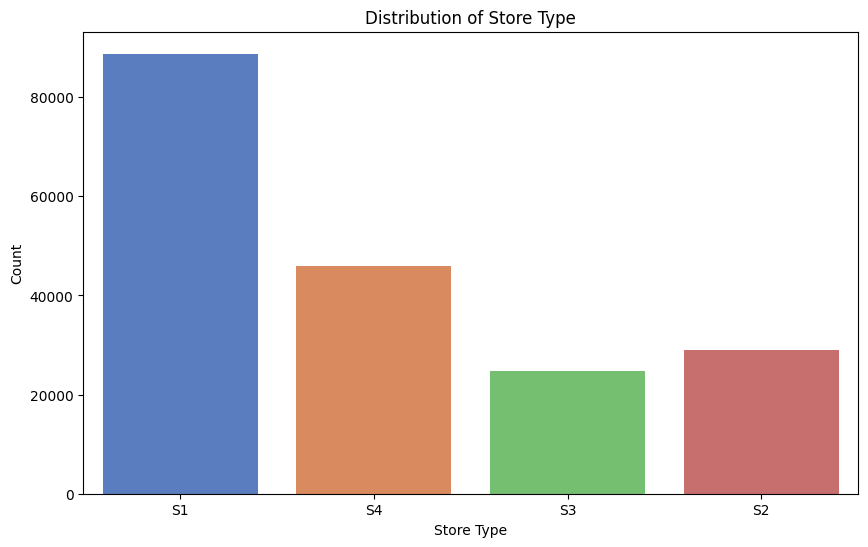

In [59]:
#Analysing Categorical Feature: Store Type
plt.figure(figsize=(10,6))
sns.countplot(x='Store_Type', data=data, palette='muted')
plt.title('Distribution of Store Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

4. Location Type

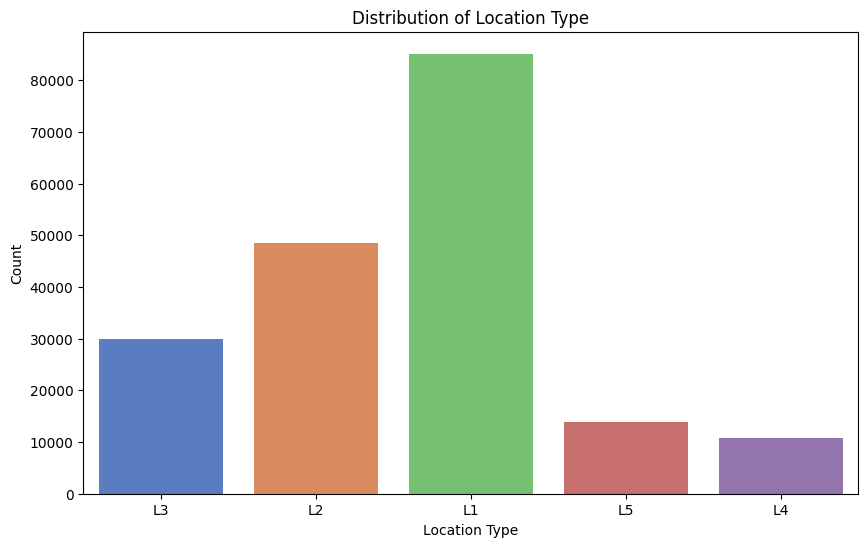

In [60]:
#Analysing Categorical Feature: Location Type
plt.figure(figsize=(10,6))
sns.countplot(x='Location_Type', data=data, palette='muted')
plt.title('Distribution of Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

5. Region Code

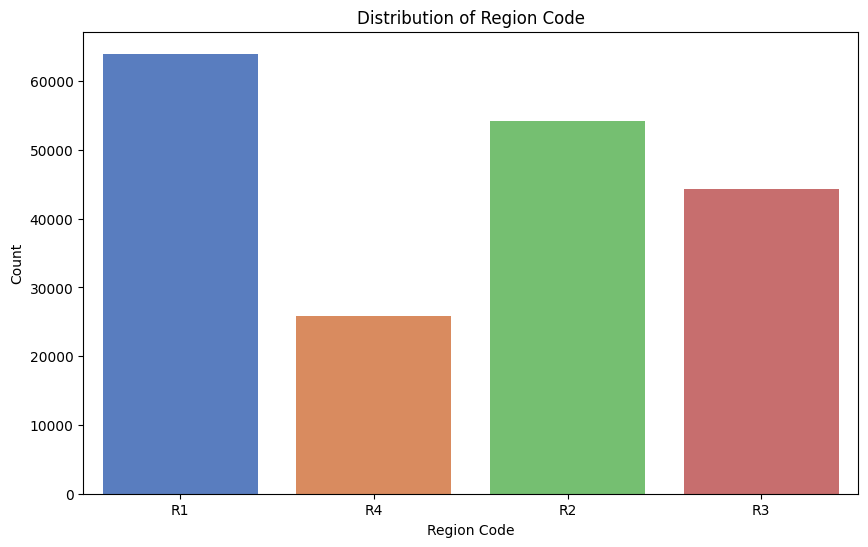

In [61]:
#Analysing Categorical Feature: Region Code
plt.figure(figsize=(10,6))
sns.countplot(x='Region_Code', data=data, palette='muted')
plt.title('Distribution of Region Code')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.show()

6. Discount

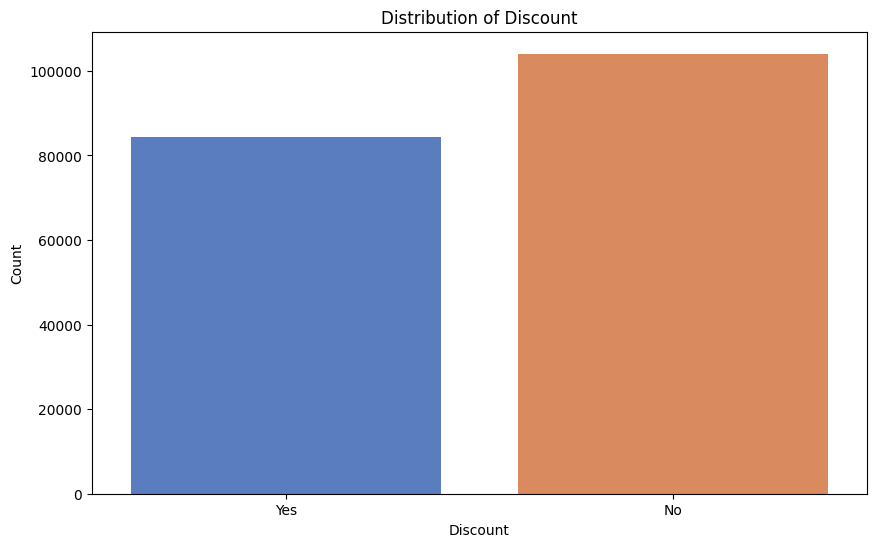

In [62]:
#Analysing Categorical Feature: Discount
plt.figure(figsize=(10,6))
sns.countplot(x='Discount', data=data, palette='muted')
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Count')
plt.show()

7. Holiday

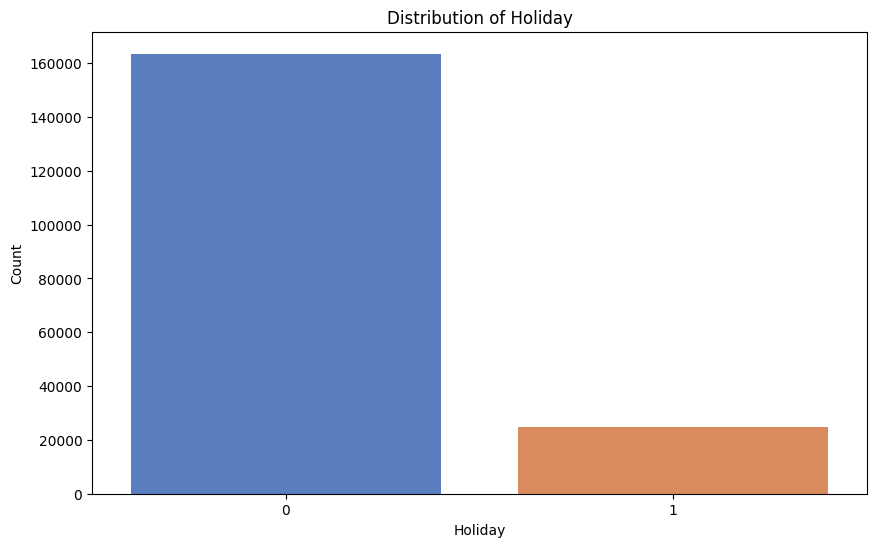

In [63]:
#Analysing Categorical Feature: Holiday
plt.figure(figsize=(10,6))
sns.countplot(x='Holiday', data=data, palette='muted')
plt.title('Distribution of Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

**Univariate Analysis: Insights**

1. Sales and Orders Distribution(Numerical Feature):

  * The distribution of both sales and orders are positively skewed/ right skewed. 
  * The majority of sales price falling between $20,000 and $70,000. The peak frequency is around 50,000 mark. Similarly the majority of the orders falling between 30 and 100. Also the peak frequency is around 60 mark.
  * Implication(Sales): Most transactions generate low to moderate sales, with a few generating exceptionally high sales. Also indicates inequality in sales distribution, where a small fraction of transactions significantly influences total revenue.
  * Implication(Orders): Most customers place smaller orders, with a few placing large or bulk orders.

2. Distribution of Store_Type, Location_type, Recgion_code, Holiday and Discount(Categorical Feature):

  * These categorical variables have a small number of unique values (4-5). Some categories dominates (like S1 in Store Type, R1 in Region Code, L1 in Location Type )
  * In Discount,2 unique values (Yes, No), indicating a binary categorical variable. 'No' is the most frequent value, meaning the majority of transactions didn't involve discounts.
  * We need to perform Bivariate analysis to understand the correlation between these categories and numerical variables like Sales and Orders.
  * Only 13.1% of transactions occurred on holidays, so we might analyze the impact of holidays on sales and orders.

**2. Bivariate Analysis:**

1. Categorical vs Numerical Analysis: Plots the relationship between a categorical variable and a numerical variable using Boxplot.
2. Numerical vs Numerical Analysis : Plots the relationship between two numerical variables using ScatterPlot.
3. Categorical vs Categorical Analysis: Plots the relationship between two categorical variables using Heatmap and Stacked Bar

**Categorical vs Numerical Analysis*

1. Store Type Vs Sales & Order

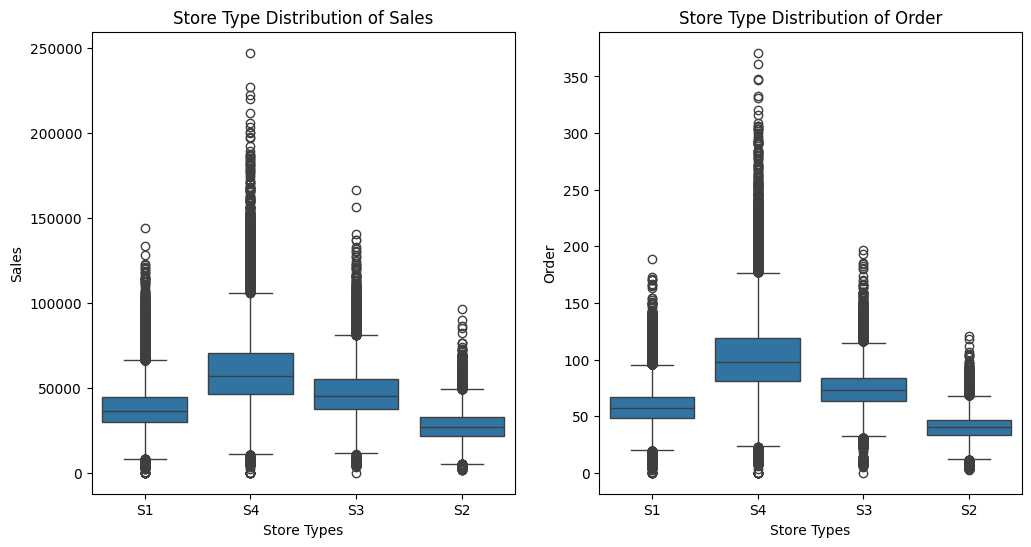

In [64]:
#Analysing the relationship between categorical variable(Store Type) and numerical variables(Sales and Order):
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x='Store_Type', y='Sales', data=data)
plt.title('Store Type Distribution of Sales')
plt.xlabel('Store Types')
plt.ylabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(x='Store_Type', y='#Order', data=data)
plt.title('Store Type Distribution of Order')
plt.xlabel('Store Types')
plt.ylabel('Order')

plt.show()

2. Location Type Vs Sales & Order

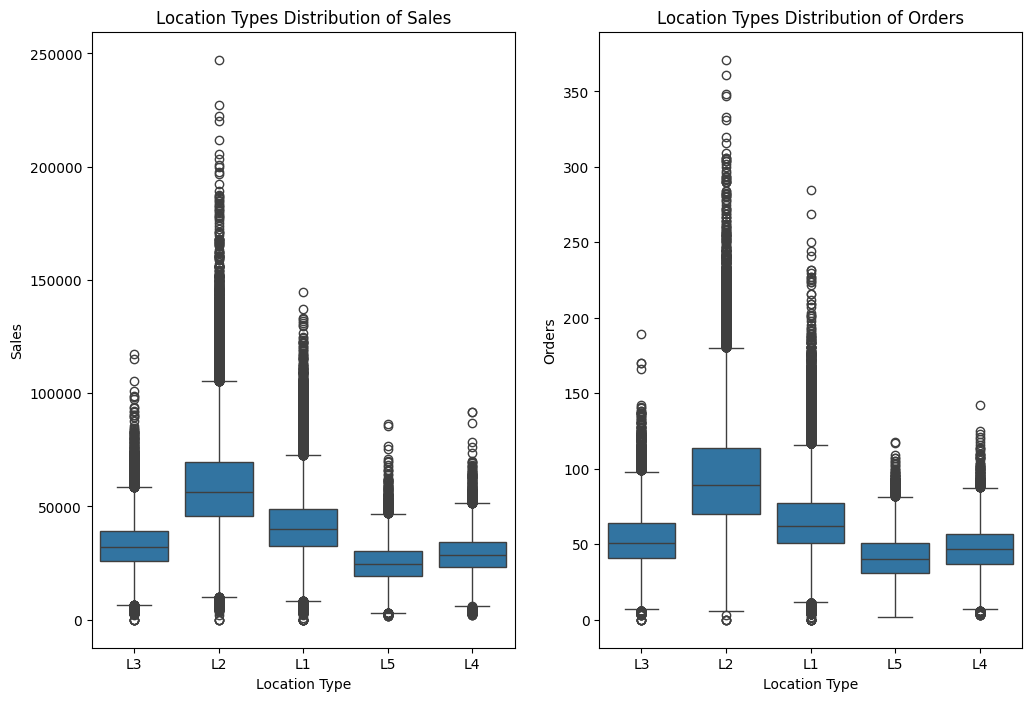

In [65]:
#Analysing the relationship between categorical variable(Location Type) and numerical variables(Sales and Order):
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(x='Location_Type', y='Sales', data=data)
plt.title('Location Types Distribution of Sales')
plt.xlabel('Location Type')
plt.ylabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(x='Location_Type', y='#Order', data=data)
plt.title('Location Types Distribution of Orders')
plt.xlabel('Location Type')
plt.ylabel('Orders')

plt.show()

3. Region Code Vs Sales & Order

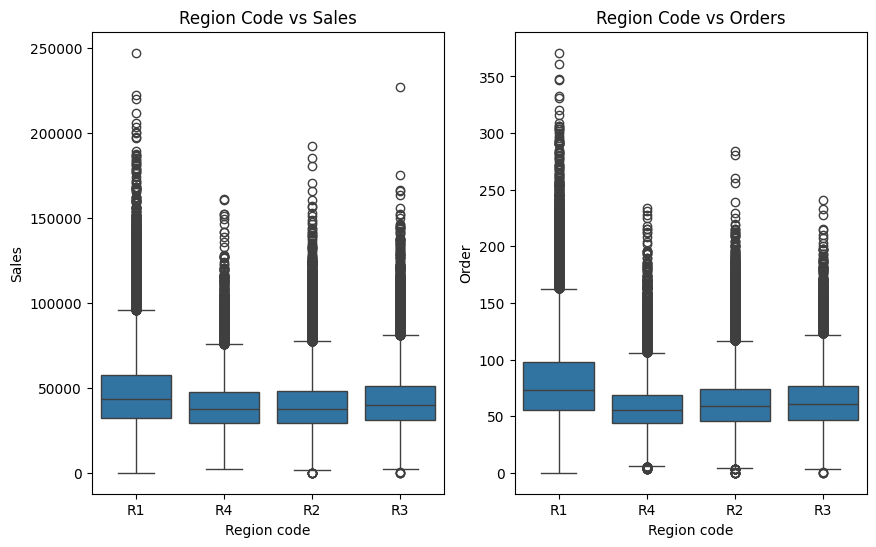

In [66]:
#Analysing the relationship between categorical variable(Region_Code) and numerical variables(Sales and order):
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x='Region_Code', y='Sales', data=data)
plt.title('Region Code vs Sales')
plt.xlabel('Region code')
plt.ylabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(x='Region_Code', y='#Order', data=data)
plt.title('Region Code vs Orders')
plt.xlabel('Region code')
plt.ylabel('Order')

plt.show()

4. Discount vs Sales and Order

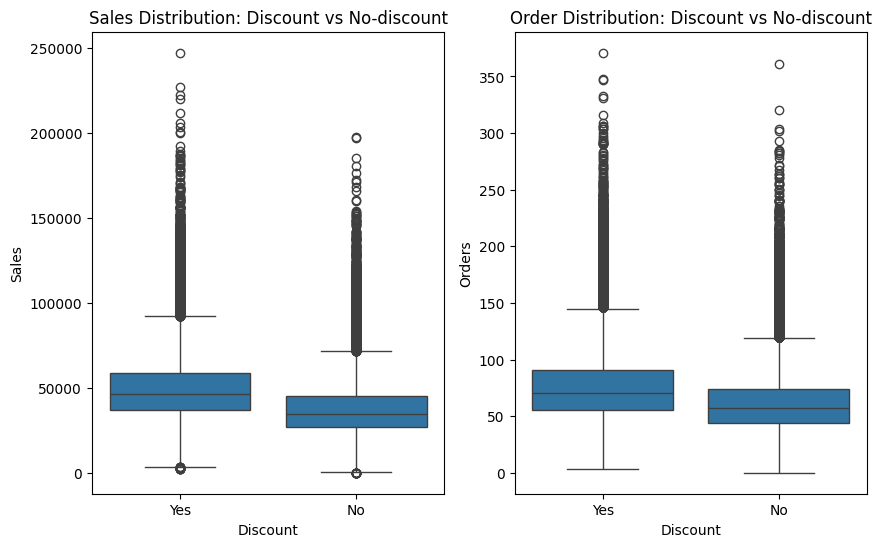

In [67]:
#Analysing the relationship between a categorical variable(Discount) and a numerical variables(Sales and Order):
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x='Discount', y='Sales', data=data)
plt.title('Sales Distribution: Discount vs No-discount')
plt.xlabel('Discount')
plt.ylabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(x='Discount', y='#Order', data=data)
plt.title('Order Distribution: Discount vs No-discount')
plt.xlabel('Discount')
plt.ylabel('Orders')

plt.show()

5. Holiday vs Sales and Order

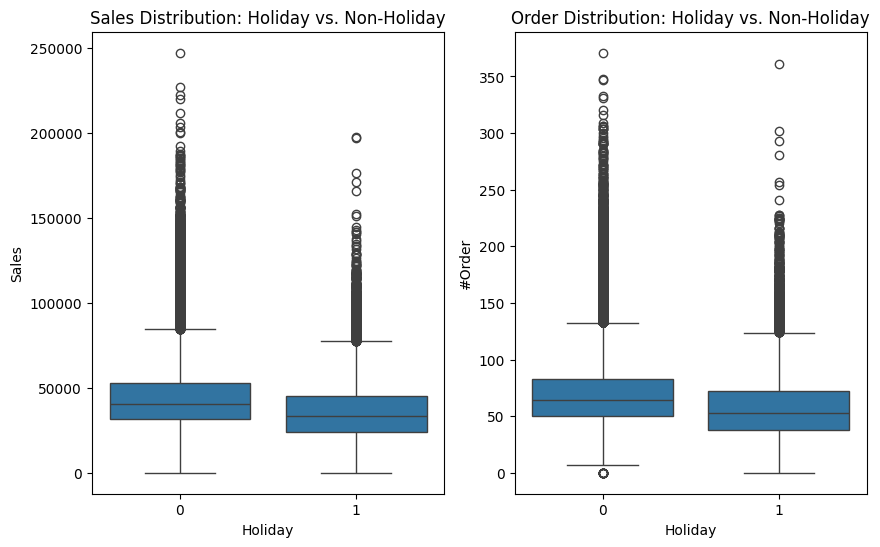

In [68]:
#Analysing the relationship between a categorical variable(Holiday) and a numerical variables(Sales and Order):
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x='Holiday', y='Sales', data=data)
plt.title('Sales Distribution: Holiday vs. Non-Holiday')
plt.ylabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(x='Holiday', y='#Order', data=data)
plt.title('Order Distribution: Holiday vs. Non-Holiday')
plt.ylabel('#Order')

plt.show()

**Numerical vs Numerical Analysis:**

1. Sales vs Order

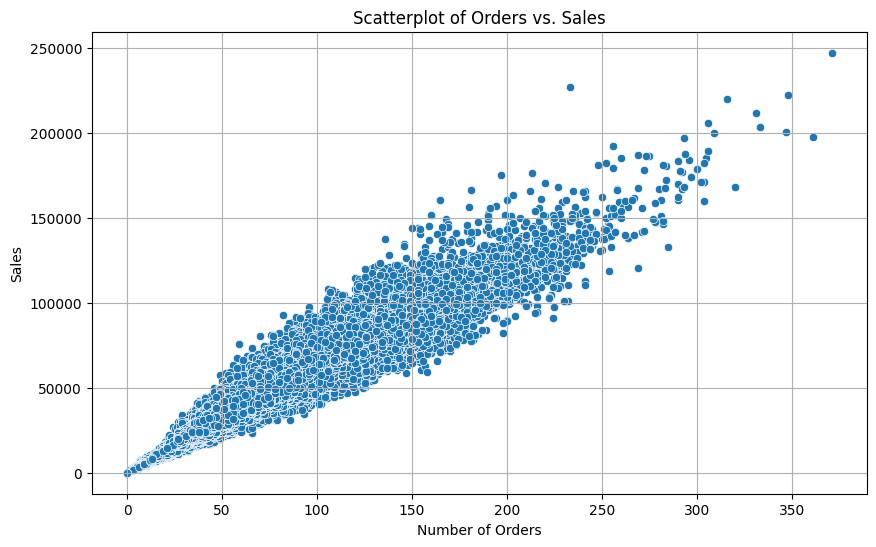

In [69]:
#Analysing the relationship between Two Numerical Features(Sales vs Orders)
plt.figure(figsize=(10,6))
sns.scatterplot(x='#Order', y='Sales', data=data)
plt.title('Scatterplot of Orders vs. Sales')
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Adding a regression line for better understanding

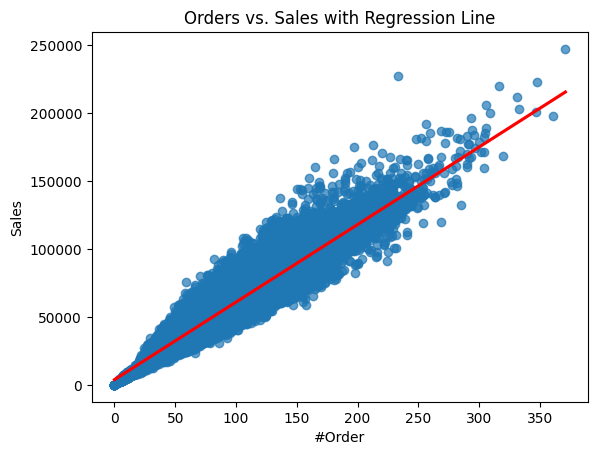

In [70]:
#adding a regression line to understand the overall trend
sns.regplot(x='#Order', y='Sales', data=data, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title('Orders vs. Sales with Regression Line')
plt.show()

Here we can analyze the relationship based on the Holiday:

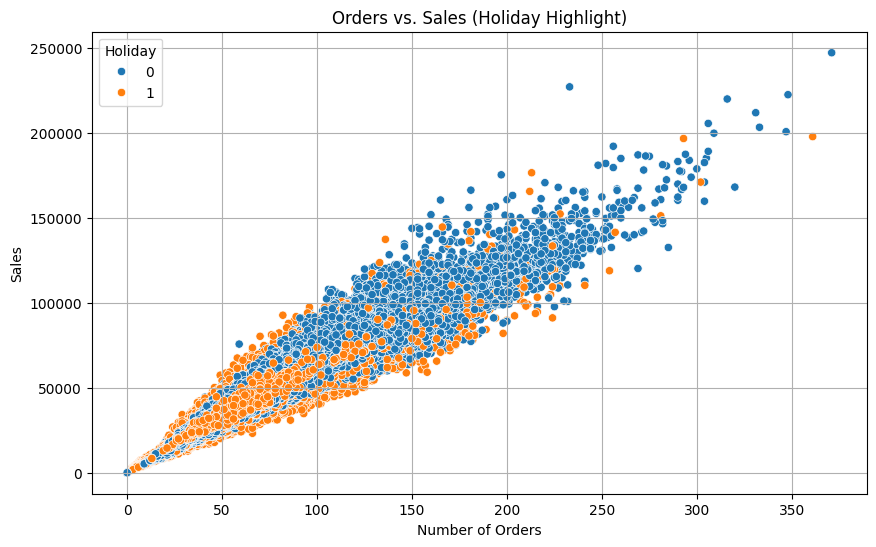

In [71]:
#Analysing the relationship between Sales vs Orders( Holiday based)
plt.figure(figsize=(10,6))
sns.scatterplot(x='#Order', y='Sales', hue='Holiday', data=data)
plt.title('Orders vs. Sales (Holiday Highlight)')
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

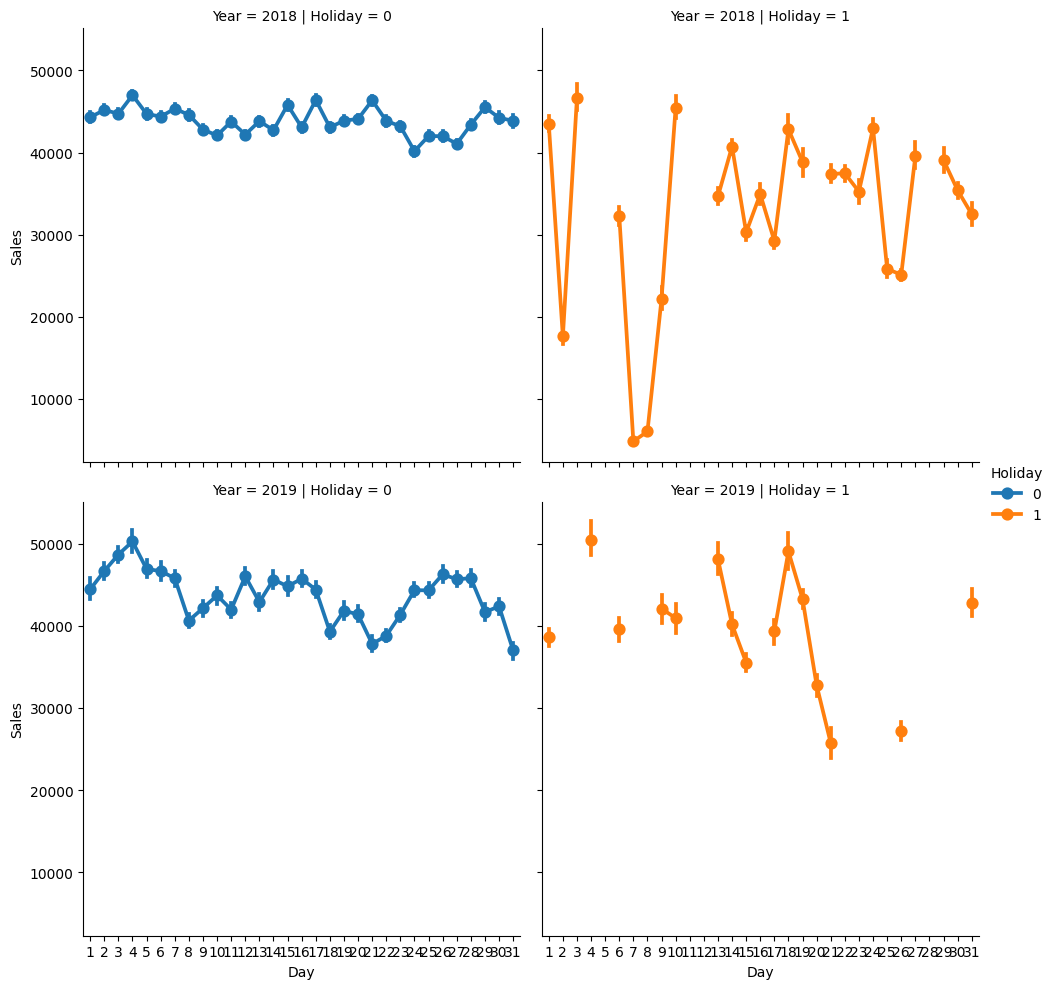

In [83]:
data['Year'] = data['Date'].dt.year
data['Day'] = data['Date'].dt.day
sns.catplot(
    data=data,
    x="Day",
    y="Sales",
    col="Holiday",
    hue="Holiday",
    row="Year",
    kind="point"
)

plt.show()

Secondly we can analyze the relationship based on the Discount:

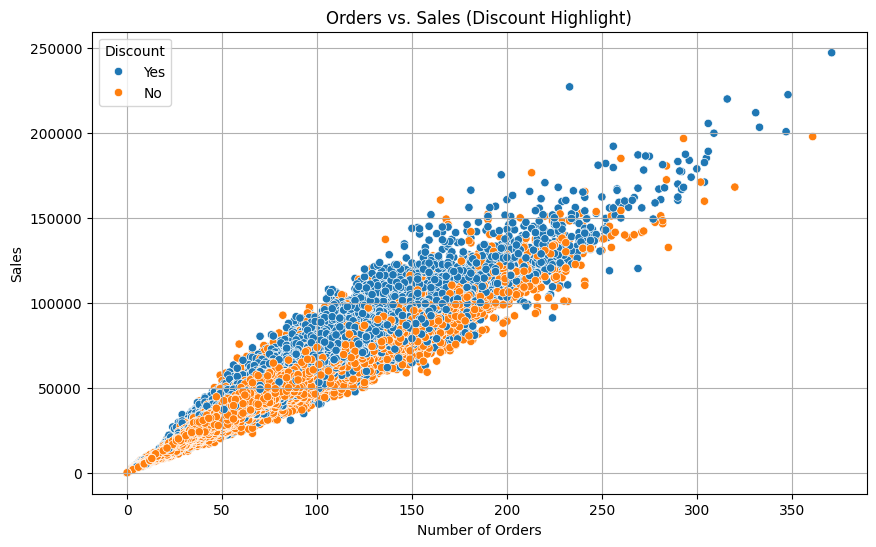

In [72]:
#Analysing the relationship between Sales vs Orders( Discount based)
plt.figure(figsize=(10,6))
sns.scatterplot(x='#Order', y='Sales', hue='Discount', data=data)
plt.title('Orders vs. Sales (Discount Highlight)')
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

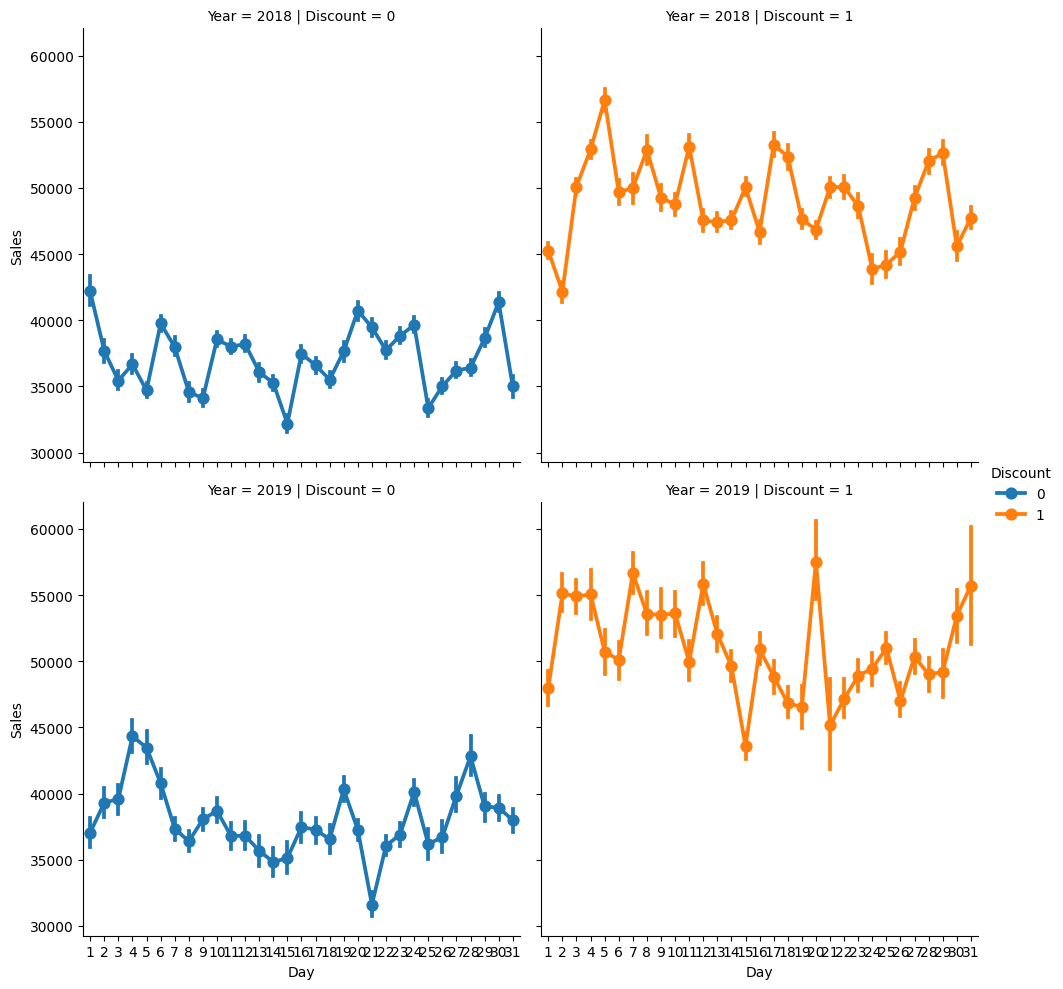

In [84]:
sns.catplot(
    data=data,
    x="Day",
    y="Sales",
    col="Discount",
    hue="Discount",
    row="Year",
    kind="point"  )

plt.show()

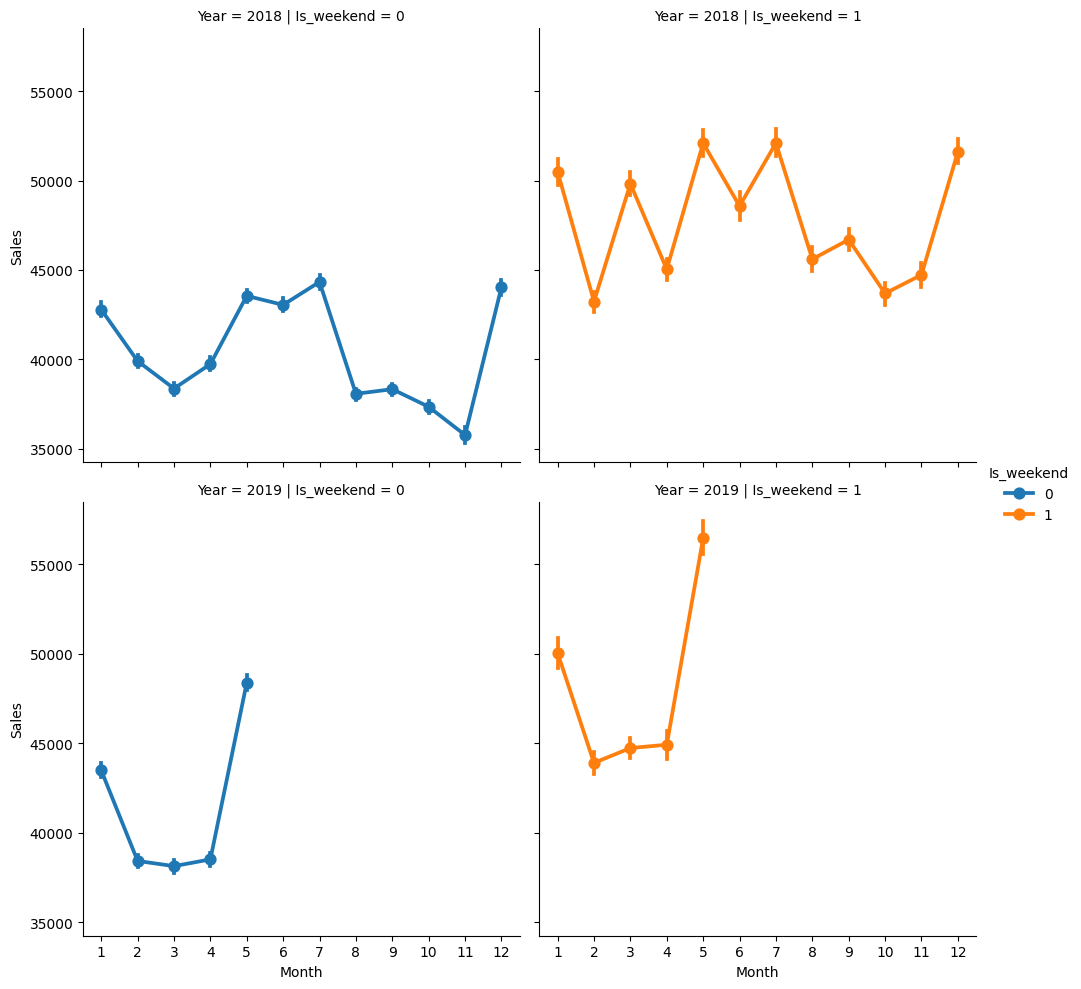

In [85]:
data['Month'] = data['Date'].dt.month
data['Is_weekend'] = data['Date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
sns.catplot(
    data=data,
    x="Month",
    y="Sales",
    col="Is_weekend",
    hue="Is_weekend",
    row="Year",
    kind="point" 
)

plt.show()

**Categorical vs Categorical Analysis**

1. Store Type vs Location Type

<Axes: xlabel='Location_Type', ylabel='Store_Type'>

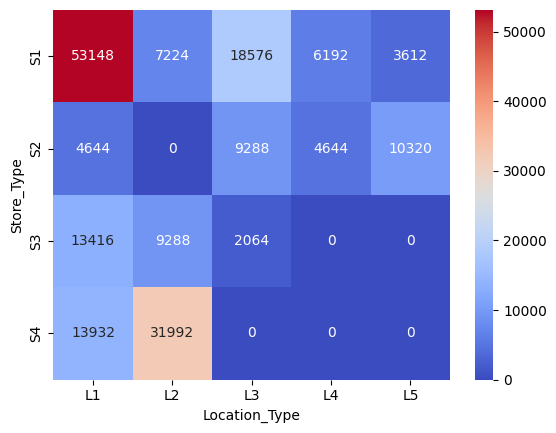

In [73]:
#Analysing the relationship between Store Type and Location Type
crosstab = pd.crosstab(data['Store_Type'], data['Location_Type'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')

Just another stacked plot for the above analysis :

<Axes: xlabel='Store_Type'>

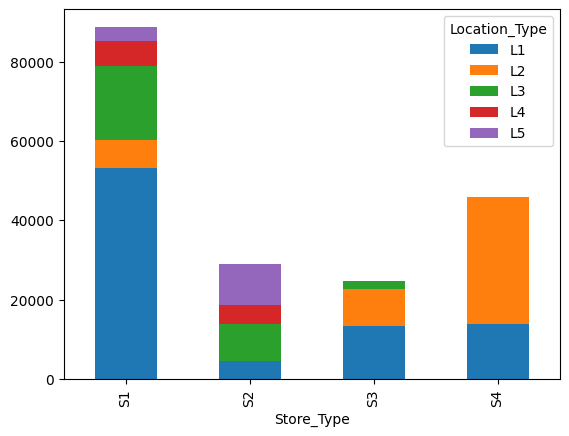

In [74]:
#analysis using stacked bar
crosstab.plot(kind='bar', stacked=True)

2. Store Type vs Region Code

<Axes: xlabel='Region_Code', ylabel='Store_Type'>

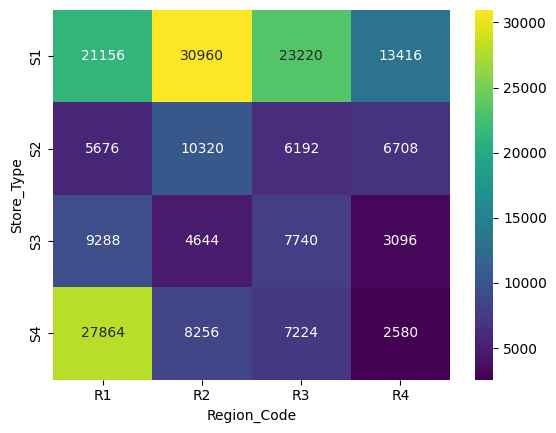

In [75]:
#Analysing the relationship between Store Type and Region Code
crosstab = pd.crosstab(data['Store_Type'], data['Region_Code'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis')

3. Location Type vs Region Code

<Axes: xlabel='Region_Code', ylabel='Location_Type'>

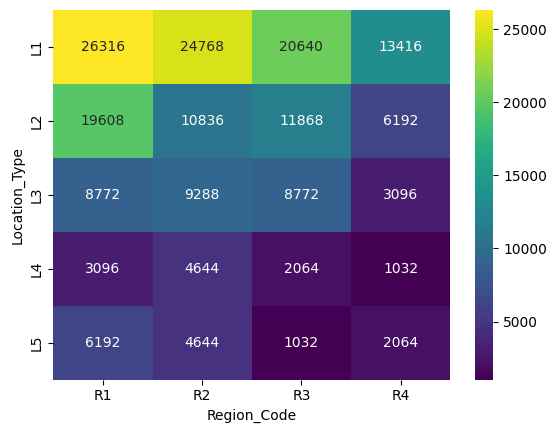

In [76]:
#Analysing the relationship between Location Type and Region Code
crosstab = pd.crosstab(data['Location_Type'], data['Region_Code'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis')

****Bivariate Analysis:****

**1.Categorical vs Numerical:**

 * Store Type vs Sales/Orders

     Insights: Store Type S4 is the highest contributor to overall sales and orders, indicating its significant performance. However, S1 has the highest transaction count, suggesting a larger customer base but lower average sales per transaction.

     Observation: Boxplot analysis reveals a high number of outliers across all store types, with S4 showing the highest number of extreme values.

     Implication: Focus on S1 to increase sales per transaction through upselling or targeted promotions. Investigate the outliers in S4 to understand exceptional transactions that could be leveraged.

 * Location Type vs Sales/Orders

     Insights: Location Type L2 is the top-performing location, contributing the most to both overall sales and orders. In contrast, L1 has the highest transaction count but lower sales.

     Observation: L2 also has the highest number of outliers in sales and orders.

     Implication: For L1, strategies should aim to increase the average sales value per transaction. Analyze L2’s outliers to identify patterns (e.g., bulk purchases) that can be replicated elsewhere.

 * Region Code vs Sales/Orders

     Insights: Region R1 performs the best in terms of sales and orders, with the highest transaction count.

     Observation: Similar to Location Type, R1 exhibits a significant number of outliers in sales.

     Implication: Prioritize maintaining high performance in R1 while examining the outliers for unique transactions that could inform broader strategies.

 * Discount vs Sales/Orders

     Insight: Sales and orders are higher when discounts are applied, as evident from boxplot analysis. However, the majority of transactions in the dataset occur without discounts.

     Observation: Outliers during discounted transactions may indicate significant sales spikes or bulk orders.

     Implication: Discounts are effective in driving sales but should be strategically applied to maximize profitability. Explore outliers during discounts to design more targeted campaigns.

 * Holiday vs Sales/Orders

     Insight: Non-holiday periods contribute more to overall sales and orders, despite holidays being less frequent.
     Observation: Outliers are present in both holiday and non-holiday sales, but sales are generally lower during holidays.
     Implication: Holiday campaigns should focus on driving higher sales through promotions or special offers, as non-holiday periods dominate the dataset’s revenue.

**2. Numerical vs Numerical Analysis**

 * Sales vs Orders
     Insight: A strong positive correlation exists between sales and orders, as observed in scatterplots. Higher orders are generally associated with higher sales.

     Observation: A few outliers are visible, representing transactions with exceptionally high sales or orders.

     Implication: Leverage this relationship by encouraging larger orders through discounts or bundle offers. Investigate outliers to understand their context and replicate these high-value transactions.

 * Sales vs Orders (Hue: Holiday)
     Insight: Scatterplot analysis shows that higher sales and orders occur during non-holiday periods, while holidays see relatively lower sales and orders.
     Observation: Non-holiday transactions dominate, but opportunities may exist to enhance holiday sales.
     Implication: Tailor holiday promotions to increase sales volume. Analyze customer preferences during holidays to craft targeted marketing campaigns.

 * Sales vs Orders (Hue: Discount)
    Insight: High sales are associated with discounted transactions, but the scatterplot also reveals a significant number of orders without discounts.
     Observation: Some high sales occur even without discounts, suggesting that factors beyond discounts (e.g., product type, store location) may influence these sales.
     Implication: While discounts drive volume, focus on enhancing non-discounted sales by promoting premium products or offering personalized recommendations.

 * Sales vs Orders (Hue: Store Type)
     Insight: Store Type S4 dominates in terms of both sales and orders, while S2 performs the lowest.
     Observation: Outliers in S4 indicate exceptional transactions, while S2 has limited orders and sales overall.
     Implication: Consider strategies to improve performance in S2, such as targeted promotions or optimizing product offerings. Analyze S4’s outliers for successful patterns to implement across other store types.

**3. Categorical vs Categorical Analysis**

* Region Code vs Store Type:
     * R2 and S1: This is the most frequent combination, with 30,960 entries. This suggests S1 stores thrive in R2, possibly reflecting regional customer preferences or better operational fit.

     * R1 and S4: The next significant combination shows a strong preference for S4 in R1, suggesting this region might have higher-value transactions or larger store footprints.

* Store Type vs Location Type:
     * L1 and S1: This combination dominates, with the highest count (53,148). It suggests that store type S1 is more suited to location type L1, possibly due to operational factors, customer preference, or geographical suitability.

     * L2 and S4: The second-highest combination (31,992) implies that S4 stores are concentrated in L2, perhaps reflecting a strategic focus in medium-to-high density areas.

* Location Type vs Region Code:
     * R1 and L1's high count could indicate that this combination has proven operational success. Expanding similar location types in regions with similar characteristics might yield positive results.

**. Multivariate Analysis**

--Perform a comprehensive multivariate analysis by generating a correlation heatmap and pairplot.

1. Heatmap

In [77]:
#Convert string to int
data['Discount'] = data['Discount'].map({'Yes': 1, 'No': 0})

In [78]:
correlation_matrix = data[['Store_id',	'#Order',	'Sales', 'Discount', 'Holiday']]
correlation_matrix

,Store_id,#Order,Sales,Discount,Holiday
0,1,9,7011.84,1,1
1,253,60,51789.12,1,1
2,252,42,36868.20,1,1
3,251,23,19715.16,1,1
4,250,62,45614.52,1,1
...,...,...,...,...,...
188335,149,51,37272.00,1,1
188336,153,90,54572.64,0,1
188337,154,56,31624.56,0,1
188338,155,70,49162.41,1,1


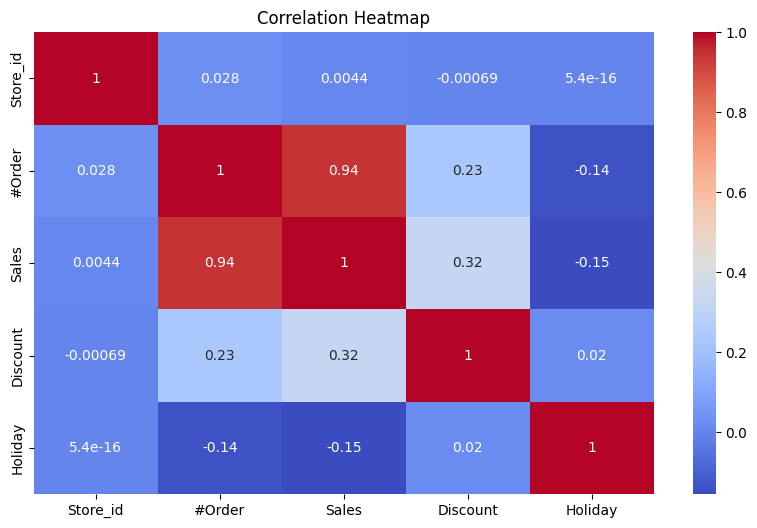

In [79]:
#Displays a correlation using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm' )
plt.title('Correlation Heatmap')
plt.show()

2. Pairplot

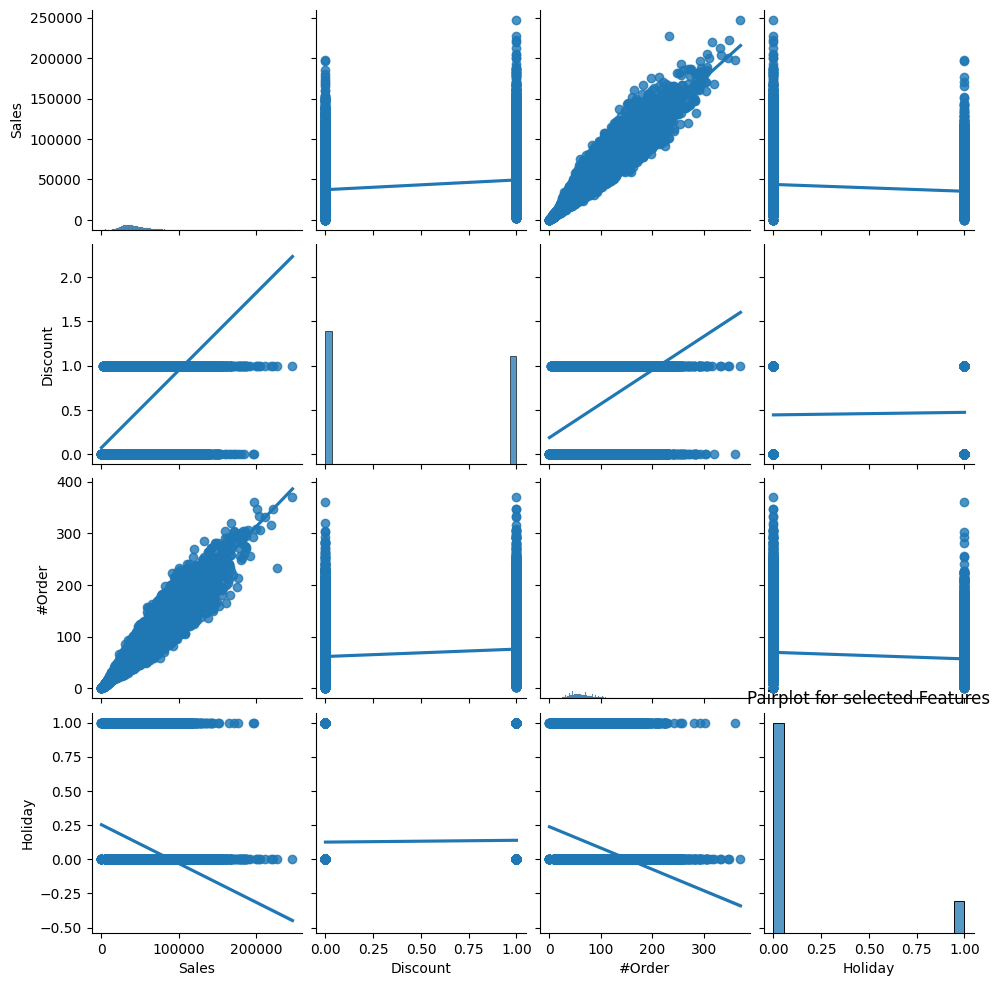

In [86]:
#generates and displays pairplot
selected_features = data[['Sales', 'Discount', 'Store_Type', '#Order','Holiday']]
sns.pairplot(selected_features, kind='reg')
plt.title('Pairplot for selected Features')
plt.show()

 **Multivariate Analysis**

 **Correlation Heatmap and Pairplot:

  * Based on the correlation heatmap, we can confirm that our previous analysis aligns well with the observed trends, indicating a solid analytical direction. The heatmap reveals a very strong positive correlation between sales and orders, with a correlation coefficient of approximately 0.94. 
 
 Additionally:
 * Store_Type demonstrates a moderate positive correlation with both sales (0.49) and orders (0.58), suggesting that the type of store significantly influences these metrics. 

 * Discount shows a mild positive correlation with sales (0.32) and orders (0.23), indicating that discounts contribute positively, albeit less strongly, to these outcomes.
 
 * Conversely, Region_Code, Location_Type, and Holiday exhibit negative correlations with both sales and orders, suggesting an inverse relationship where these factors may hinder overall performance.


# **5. Hypothesis Testing**

--1. Impact of Discounts on Sales

--2. Effect of Holidays on Sales

--3. Sales Differences Across Store Types

--4. Regional Sales Variability

--5. Correlation Between Number of Orders and Sales


**1. Analysis to understand the impact of Discounts on sales using two-sample t-test**

In [88]:
#Apply squre root transformation on sales
data['sqrt_sales'] = data['Sales'].apply(lambda x: np.sqrt(x))

In [39]:
# Null Hypothesis (H0): The mean sales on days with discounts are equal to the mean sales on days without discounts.
# Alternative Hypothesis(H1): The mean sales on days with discounts are higher than on days without discounts.
from scipy.stats import ttest_ind
sales_with_discount = data[data['Discount'] == 1]['sqrt_sales']
sales_without_discount = data[data['Discount'] == 0]['sqrt_sales']

t_stat, p_value = ttest_ind(sales_with_discount, sales_without_discount, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 153.2597126361024, P-value: 0.0


This above code conducts an independent t-test to compare the mean sales (square root transformed) between two groups: Sales with discounts (Discount == 1) & Sales without discounts (Discount == 0).

Insights:

* Since the p-value is very close to 0, we reject the null hypothesis (H₀).

* This suggests a statistically significant increase in sales on discount days compared to non-discount days.

* Discounts appear to have a positive effect on sales.

**2. Analysis to understand the impact of Holiday on sales using two-sample t-test**

In [40]:
# Null Hypothesis (H0): The mean sales on Holidays are equal to the mean sales on Non-Holidays.
# Alternative Hypothesis(H1): The mean sales on Holidays are higher than on Non-Holidays
sales_holiday = data[data['Holiday'] == 1]['sqrt_sales']
sales_non_holiday = data[data['Holiday'] == 0]['sqrt_sales']

t_stat, p_value = ttest_ind(sales_holiday, sales_non_holiday, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -70.78506797909186, P-value: 0.0


In [89]:
from scipy.stats import mannwhitneyu

# Define the two groups
sales_holiday = data[data['Holiday'] == 1]['sqrt_sales']
sales_non_holiday = data[data['Holiday'] == 0]['sqrt_sales']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(sales_holiday, sales_non_holiday, alternative='two-sided')

# Print results
print(f"U-Statistic: {u_stat}, P-value: {p_value}")

U-Statistic: 1478686923.5, P-value: 0.0


This code performs an independent t-test to compare the mean sales (square root transformed) between two groups: Sales on Holidays (Holiday == 1) & Sales on Non-Holidays (Holiday == 0)

Insights:

* Since the p-value is very close to 0, we reject the null hypothesis (H₀).

* This suggests a statistically significant increase in sales on holidays compared to non-holidays.

* Holidays positively impact sales, making them significantly higher than on regular days.

**3. Analysis to understand the Sales Differences Across Store Types**

In [41]:
# Null Hypothesis (H0): The mean sales are the same across all store types.
# Alternative Hypothesis(H1): At least one store type has a significantly different mean sales.
from scipy.stats import f_oneway

# Group the dataset by 'Store_Type' and extract raw 'Sales' data for each store type
store_sales = [group['sqrt_sales'] for _, group in data.groupby('Store_Type')]
f_stat, p_value = f_oneway(*store_sales)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 34474.76476345863, P-value: 0.0


Interpretion:

* High F-statistic (34,474.76): This suggests that the variation between the groups (store types) is much larger than the variation within each group. It implies that the mean sales across store types are not equal and that store type has a substantial effect on sales.

* P-value close to 0: Given that the p-value is close to 0, this reinforces the finding that the differences in mean sales between store types are statistically significant.

So we conclude that, at least one store type has significantly different mean sales compared to the others.

**4. Regional sales Variability analysis: KS-Test**

In [ ]:
#H0: The mean sales are the same across all regions.
#H1: At least one region has significantly different sales.
from scipy.stats import kruskal

region_sales = [group['sqrt_sales'] for _, group in data.groupby('Region_Code')]
h_stat, p_value = kruskal(*region_sales)
print(f"Kruskal-Wallis H-statistic: {h_stat}, P-value: {p_value}")

Kruskal-Wallis H-statistic: 3968.063590460681, P-value: 0.0


Insights:

* Kruskal-Wallis H-statistic: 3968.06: The higher the statistic, the greater the difference between groups.

* P-value: 0.0: This very small p-value (essentially zero) indicates that the difference between the regions is extremely unlikely to have occurred by chance.

* So we reject null hypothesis, and strongly suggests that at least one region has significantly different median sales compared to the others.

**5. Correlation Between Number of Orders and Sales**

In [90]:
#H0: There is no correlation between the number of orders and sales.
#H1: There is a significant correlation between the number of orders and sales.

from scipy.stats import pearsonr

corr_coeff, p_value = pearsonr(data['#Order'], data['sqrt_sales'])
print(f"Pearson Correlation Coefficient: {corr_coeff}, P-value: {p_value}")

Pearson Correlation Coefficient: 0.925422371188727, P-value: 0.0


Insights:

* This performs a Pearson correlation test between the number of orders (#Order) and the square root of sales (sqrt_sales).

* Pearson Correlation Coefficient: 0.9254: This value indicates a strong positive correlation between the number of orders and sales. As the number of orders increases, the sales tend to increase as well.

* P-value: 0.0: The p-value being essentially zero indicates that the observed correlation is statistically significant. This means there is virtually no chance that the correlation observed is due to random variation.

# **Hypothesis testing Conclusion:**

* Conclusion 1: Since p-value ≈ 0.00, reject H₀. Discounts have a significant impact on sales. Sales differ significantly between days with discounts and without discounts.

* Conclusion 2: Since p-value ≈ 0.00, reject H₀. There is a significant difference in sales between holidays and non-holidays. So we can further analyze whether holidays lead to higher or lower sales by examining the means or visualizing the data.

* Conclusion 3: Since p-value ≈ 0.00, reject H₀. Sales vary significantly across store types.

* Conclusion 4: Since p-value ≈ 0.00, reject H₀. There is significant variability in sales across regions.

* Conclusion 5: Since p-value ≈ 0.00, reject H₀. There is a significant correlation between the number of orders and sales. Based on the data, higher orders are associated with higher sales.